## Download the data

In [11]:
import requests
quakes_response=requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                    params={
        'starttime':"2000-01-01",
        "maxlatitude":"58.723",
        "minlatitude":"50.008",
        "maxlongitude":"1.67",
        "minlongitude":"-9.756",
        "minmagnitude":"1",
        "endtime":"2015-07-13",
        "orderby":"time-asc"}
                   )

## Parse the data as JSON

In [12]:
import json

In [13]:
requests_json = json.loads(quakes_response.text)

## Investigate the data to discover how it is structured.

In [14]:
type(requests_json)

dict

In [15]:
requests_json.keys()

[u'type', u'features', u'bbox', u'metadata']

In [16]:
len(requests_json['features'])

110

In [17]:
requests_json['features'][0].keys()

[u'geometry', u'type', u'properties', u'id']

In [18]:
requests_json['features'][0]['properties']['mag']

2.6

In [19]:
requests_json['features'][0]['geometry']

{u'coordinates': [-2.81, 54.77, 14], u'type': u'Point'}

## Find the largest quake

In [22]:
quakes = requests_json['features']

In [23]:
largest_so_far = quakes[0]
for quake in quakes:
    if quake['properties']['mag'] > largest_so_far['properties']['mag']:
        largest_so_far = quake
print largest_so_far['properties']['mag']

4.8


In [24]:
lat=largest_so_far['geometry']['coordinates'][1]
long=largest_so_far['geometry']['coordinates'][0]
print "Latitude:", lat, "Longitude:", long

Latitude: 52.52 Longitude: -2.15


## Get a map at the point of the quake

In [25]:
import requests
def request_map_at(lat,long, satellite=False,zoom=12,size=(400,400),sensor=False):
  base="http://maps.googleapis.com/maps/api/staticmap?"
  
  params=dict(
    sensor= str(sensor).lower(),
    zoom= zoom,
    size= "x".join(map(str,size)),
    center= ",".join(map(str,(lat,long)))
  )
  if satellite:
    params["maptype"]="satellite"

  return requests.get(base,params=params)

In [26]:
import IPython
map_png=request_map_at(lat, long,zoom=10)

## Display the map

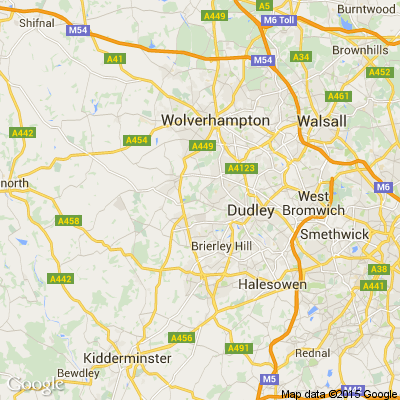

In [27]:
IPython.core.display.Image(map_png.content)